# Mean Shift Clustering Demo

This notebook implements a simple mean shift clustering algorithm that is used to cluster data into distinct groups. This is an unsupervised algorithm that simply predicts labels based on data. 

In [1]:
import pandas as pd
import numpy as np

# Define the column names
column_names = [
    "Class",
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Alcalinity_of_Ash",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280_OD315",
    "Proline"
]

# Specify the file path
file_path = "wine/wine.data" 
wine_df = pd.read_csv(file_path, header=None, names=column_names)

labels = wine_df["Class"]  # Assuming "Class" is the label column
targets = wine_df.drop(columns=["Class"])

labels = labels.values
targets = targets.values

In [4]:
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def initialize_mean_shift(data):
    return np.zeros_like(data, dtype=float)

def calculate_mean_shift(data, kernel_bandwidth):
    mean_shift = initialize_mean_shift(data)
    
    for i in range(len(data)):
        x = data[i]
        numerator = 0.0
        denominator = 0.0
        
        for j in range(len(data)):
            x_i = data[j]
            u = np.linalg.norm(x - x_i) / kernel_bandwidth
            weight = gaussian_kernel(u)
            numerator += weight * (x_i - x)
            denominator += weight
        
        mean_shift[i] = numerator / denominator if denominator != 0 else 0.0
    
    return mean_shift

def update_data_points(data, mean_shift):
    return data + mean_shift

def mean_shift_clustering(data, kernel_bandwidth, max_iterations=100, convergence_threshold=1e-5):
    for _ in range(max_iterations):
        mean_shift = calculate_mean_shift(data, kernel_bandwidth)
        data_shifted = update_data_points(data, mean_shift)
        
        # Check for convergence
        if np.linalg.norm(mean_shift) < convergence_threshold:
            break

        data = data_shifted
    
    return data_shifted


results = mean_shift_clustering(targets, 0.5)


In [23]:
import numpy as np

def mean_shift_clustering(data, kernel_bandwidth, max_iterations=100, convergence_threshold=1e-5):
    gaussian_kernel = lambda u: (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)
    
    for _ in range(max_iterations):
        mean_shift = np.array([
            sum(
                gaussian_kernel(np.linalg.norm(x - x_i) / kernel_bandwidth) * (x_i - x) 
                for x_i in data
        ) / sum(
                gaussian_kernel(np.linalg.norm(x - x_i) / kernel_bandwidth) 
                for x_i in data
        )
        if sum(
            gaussian_kernel(np.linalg.norm(x - x_i) / kernel_bandwidth) 
            for x_i in data
        ) != 0 
        else np.zeros_like(x)
            for x in data
        ])

        data = data + mean_shift

        if np.linalg.norm(mean_shift) < convergence_threshold:
            break

    return data

# Example usage:
# Assuming 'targets' is your dataset and '0.5' is your bandwidth
results = mean_shift_clustering(targets, 0.5)


In [6]:
print(results.shape)

(178, 13)


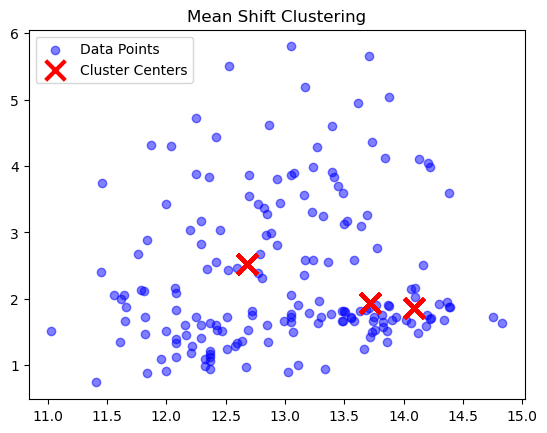

In [24]:
import matplotlib.pyplot as plt

def visualize_clusters(data, cluster_centers):
    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5, label='Data Points')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
    plt.title('Mean Shift Clustering')
    plt.legend()
    plt.show()

# Example Usage
bandwidth = 63.0
result = mean_shift_clustering(targets, bandwidth)
visualize_clusters(targets, result)


In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Assuming 'X' is your dataset
bandwidth = estimate_bandwidth(targets, quantile=0.1, n_samples=len(targets))
print(f"Estimated Bandwidth: {bandwidth}")

# Create Mean Shift model with the estimated bandwidth
ms = MeanShift(bandwidth=bandwidth)
ms.fit(targets)

Estimated Bandwidth: 63.17520286363913


MeanShift(bandwidth=63.17520286363913)